# Phase 1: Problem Definition
## Understand Objectives
### Problem Statement
_To analyze and model the relationship between specific audio features and song popularity, aiming to identify the most influential features and develop a robust predictive model, thereby providing actionable insights for the music industry and contributing to academic research._
### Success Criteria
- Achieving an adjusted R-squared > 0.8.
- RMSE and MAE below acceptable thresholds established after data exploration.
- Statistical significance of key predictors at the 0.05 significance level.

# Phase 2: Data Acquisition and Understanding

In [118]:

import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelBinarizer
from scipy.stats import boxcox

## Data Collection
We have collected a raw dataset named ["Most Streamed Spotify Songs 2023"](https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023) on Kaggle.

## Data Understanding

### Explore Data Structure

In [119]:
# Data loading
spotify_2023_df = pd.read_csv('../data/raw/spotify-2023.csv', encoding='latin-1')
spotify_2023_df.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,84,...,144,A,Minor,65,23,80,14,63,11,6


In [120]:
spotify_2023_df.tail()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
948,My Mind & Me,Selena Gomez,1,2022,11,3,953,0,91473363,61,...,144,A,Major,60,24,39,57,0,8,3
949,Bigger Than The Whole Sky,Taylor Swift,1,2022,10,21,1180,0,121871870,4,...,166,F#,Major,42,7,24,83,1,12,6
950,A Veces (feat. Feid),"Feid, Paulo Londra",2,2022,11,3,573,0,73513683,2,...,92,C#,Major,80,81,67,4,0,8,6
951,En La De Ella,"Feid, Sech, Jhayco",3,2022,10,20,1320,0,133895612,29,...,97,C#,Major,82,67,77,8,0,12,5
952,Alone,Burna Boy,1,2022,11,4,782,2,96007391,27,...,90,E,Minor,61,32,67,15,0,11,5


In [121]:
spotify_2023_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 953 entries, 0 to 952
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   track_name            953 non-null    object
 1   artist(s)_name        953 non-null    object
 2   artist_count          953 non-null    int64 
 3   released_year         953 non-null    int64 
 4   released_month        953 non-null    int64 
 5   released_day          953 non-null    int64 
 6   in_spotify_playlists  953 non-null    int64 
 7   in_spotify_charts     953 non-null    int64 
 8   streams               953 non-null    object
 9   in_apple_playlists    953 non-null    int64 
 10  in_apple_charts       953 non-null    int64 
 11  in_deezer_playlists   953 non-null    object
 12  in_deezer_charts      953 non-null    int64 
 13  in_shazam_charts      903 non-null    object
 14  bpm                   953 non-null    int64 
 15  key                   858 non-null    ob

In [122]:
spotify_2023_df.describe()

,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,in_apple_playlists,in_apple_charts,in_deezer_charts,bpm,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
count,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000,953.00000,953.000000,953.000000,953.000000,953.000000,953.000000,953.000000
mean,1.556139,2018.238195,6.033578,13.930745,5200.124869,12.009444,67.812172,51.908709,2.666317,122.540399,66.96957,51.431270,64.279119,27.057712,1.581322,18.213012,10.131165
std,0.893044,11.116218,3.566435,9.201949,7897.608990,19.575992,86.441493,50.630241,6.035599,28.057802,14.63061,23.480632,16.550526,25.996077,8.409800,13.711223,9.912888
min,1.000000,1930.000000,1.000000,1.000000,31.000000,0.000000,0.000000,0.000000,0.000000,65.000000,23.00000,4.000000,9.000000,0.000000,0.000000,3.000000,2.000000
25%,1.000000,2020.000000,3.000000,6.000000,875.000000,0.000000,13.000000,7.000000,0.000000,100.000000,57.00000,32.000000,53.000000,6.000000,0.000000,10.000000,4.000000
50%,1.000000,2022.000000,6.000000,13.000000,2224.000000,3.000000,34.000000,38.000000,0.000000,121.000000,69.00000,51.000000,66.000000,18.000000,0.000000,12.000000,6.000000
75%,2.000000,2022.000000,9.000000,22.000000,5542.000000,16.000000,88.000000,87.000000,2.000000,140.000000,78.00000,70.000000,77.000000,43.000000,0.000000,24.000000,11.000000
max,8.000000,2023.000000,12.000000,31.000000,52898.000000,147.000000,672.000000,275.000000,58.000000,206.000000,96.00000,97.000000,97.000000,97.000000,91.000000,97.000000,64.000000


### Split the Data in Train and Test Set

In [123]:
raw_data_path = '../data/raw'

In [124]:
# # Split the data into training and test sets
# from sklearn.model_selection import train_test_split

# train_set, test_set = train_test_split(spotify_2023_df, test_size=0.15, random_state=42)

# # Save the train_set and test_set in .csv files

# train_set.to_csv(f'{raw_data_path}/train_set.csv', index=False)
# test_set.to_csv(f'{raw_data_path}/test_set.csv', index=False)

In [125]:
# Read the train set
train_set = pd.read_csv(f"{raw_data_path}/train_set.csv",)
train_set.head()

,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Peru,"Ed Sheeran, Fireboy DML",2,2021,12,23,2999,0,261286503,60,...,108,G,Minor,96,71,42,57,0,8,9
1,Fuera del mercado,Danny Ocean,1,2022,2,17,2499,21,421365166,68,...,92,G#,Major,45,27,67,32,0,13,14
2,Sobrio,Maluma,1,2021,7,8,3506,10,513643924,103,...,178,F,Major,76,63,77,14,0,15,22
3,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,2023,5,22,182,8,54225632,3,...,110,G,Minor,76,96,72,32,0,9,4
4,Murder In My Mind,Kordhell,1,2022,1,21,2459,20,448843705,20,...,120,A#,Major,71,57,97,1,0,13,11


In [126]:
train_set.shape

(810, 24)

### Drop Unimportant Columns

- Based on the problem that we're trying to model, there're columns that we don't need.
- To predict the streams of an un-released track, these columns are things we don't need:
    - `released_year`
    - `released_month`
    - `released_day`
    - `in_spotify_playlists`
    - `in_spotify_charts`
    - `in_apple_playlists`
    - `in_apple_charts`
    - `in_apple_charts`
    - `in_deezer_playlists`
    - `in_deezer_charts`
    - `in_shazam_charts`

In [127]:
# Define the list of columns
columns_to_drop = [
    'released_year',
    'released_month',
    'released_day',
    'in_spotify_playlists',
    'in_spotify_charts',
    'in_apple_playlists',
    'in_apple_charts',
    'in_deezer_playlists',
    'in_deezer_charts',
    'in_shazam_charts',
]

# Drop those columns
train_set = train_set.drop(columns=columns_to_drop)

# Check the result
train_set.head()

,track_name,artist(s)_name,artist_count,streams,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Peru,"Ed Sheeran, Fireboy DML",2,261286503,108,G,Minor,96,71,42,57,0,8,9
1,Fuera del mercado,Danny Ocean,1,421365166,92,G#,Major,45,27,67,32,0,13,14
2,Sobrio,Maluma,1,513643924,178,F,Major,76,63,77,14,0,15,22
3,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,54225632,110,G,Minor,76,96,72,32,0,9,4
4,Murder In My Mind,Kordhell,1,448843705,120,A#,Major,71,57,97,1,0,13,11


### Rename Columns

In [128]:
need_to_be_removed_chars = ['_', '%']

# Remove the characters from the column names
train_set.columns = train_set.columns.str.replace('_', ' ')
train_set.columns = train_set.columns.str.replace('%', 'percentage')

# Check the result
train_set.head()

,track name,artist(s) name,artist count,streams,bpm,key,mode,danceability percentage,valence percentage,energy percentage,acousticness percentage,instrumentalness percentage,liveness percentage,speechiness percentage
0,Peru,"Ed Sheeran, Fireboy DML",2,261286503,108,G,Minor,96,71,42,57,0,8,9
1,Fuera del mercado,Danny Ocean,1,421365166,92,G#,Major,45,27,67,32,0,13,14
2,Sobrio,Maluma,1,513643924,178,F,Major,76,63,77,14,0,15,22
3,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,54225632,110,G,Minor,76,96,72,32,0,9,4
4,Murder In My Mind,Kordhell,1,448843705,120,A#,Major,71,57,97,1,0,13,11


### Assess Data Quality

#### Missing Values

In [129]:
train_set.isnull().sum()

track name                      0
artist(s) name                  0
artist count                    0
streams                         0
bpm                             0
key                            81
mode                            0
danceability percentage         0
valence percentage              0
energy percentage               0
acousticness percentage         0
instrumentalness percentage     0
liveness percentage             0
speechiness percentage          0
dtype: int64

- By observation, we can see that there're just some missing values need to be handled. We will tackle these in the substep of handling missing data in Phase 3: Data Preparation.

#### Duplicates

In [130]:
# Drop the duplicated rows
train_set = train_set.drop_duplicates()

#### Outliers and Anomalies

In [131]:
# Inspect the data type of each column
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 809
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   track name                   809 non-null    object
 1   artist(s) name               809 non-null    object
 2   artist count                 809 non-null    int64 
 3   streams                      809 non-null    object
 4   bpm                          809 non-null    int64 
 5   key                          728 non-null    object
 6   mode                         809 non-null    object
 7   danceability percentage      809 non-null    int64 
 8   valence percentage           809 non-null    int64 
 9   energy percentage            809 non-null    int64 
 10  acousticness percentage      809 non-null    int64 
 11  instrumentalness percentage  809 non-null    int64 
 12  liveness percentage          809 non-null    int64 
 13  speechiness percentage       809 non-nul

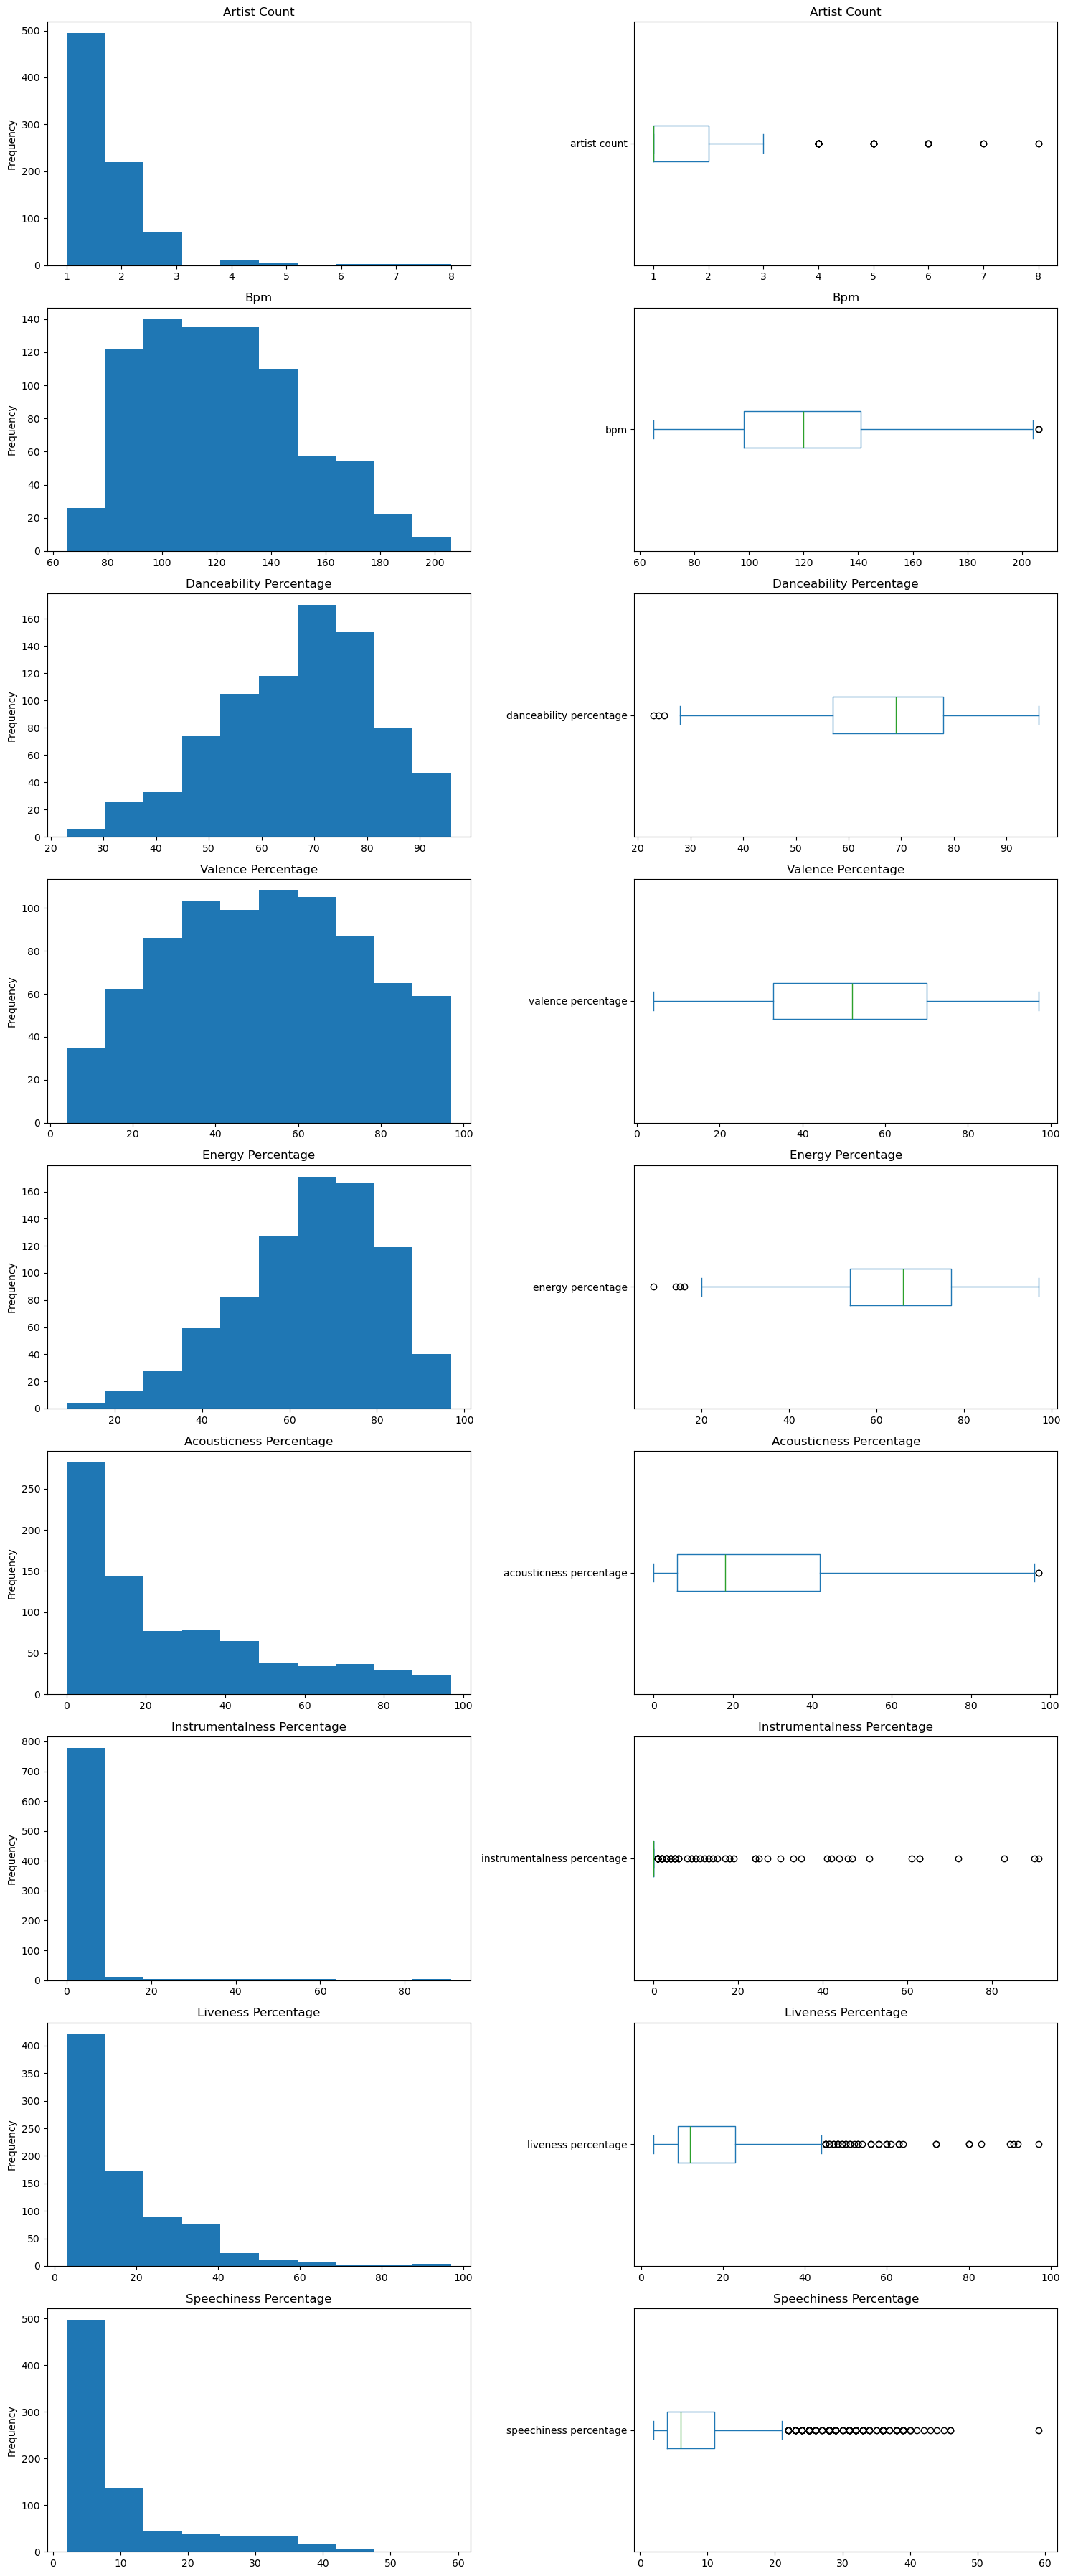

In [132]:
# Get the column name of numerical columns
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns

# For each columns plot a histogram and a boxplot horizontally side by side
fig, axs = plt.subplots(nrows=len(numerical_columns), ncols=2, figsize=(15, 36))

for i, col in enumerate(numerical_columns):
    train_set[col].plot(kind='hist', ax=axs[i, 0], title=col.title())
    train_set[col].plot(kind='box', ax=axs[i, 1], title=col.title(), vert=False)
    
plt.tight_layout()

- Furthermore, because we cannot observe clearly the boxplot for `artist count` and `instrumentalness percentage`, I will plot them again below.

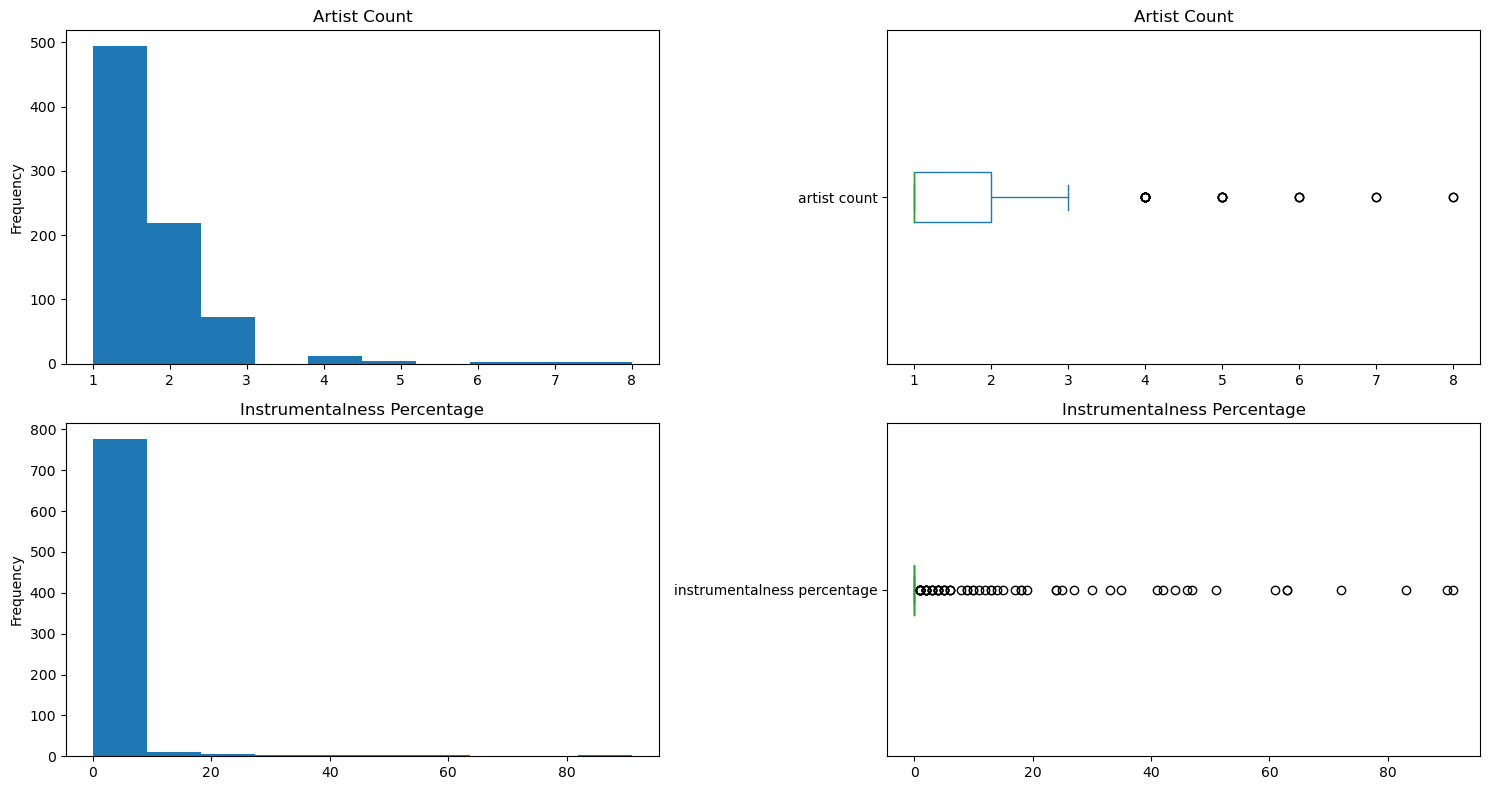

In [133]:
# Plot histogram and boxplot for `Artist Count` and `Instrumentalness Percentage` side-by-side separately
fig, axs = plt.subplots(nrows=2, ncols=2, figsize=(15, 8))

train_set['artist count'].plot(kind='hist', ax=axs[0, 0], title='Artist Count')
train_set['artist count'].plot(kind='box', ax=axs[0, 1], title='Artist Count', vert=False)

train_set['instrumentalness percentage'].plot(kind='hist', ax=axs[1, 0], title='Instrumentalness Percentage')
train_set['instrumentalness percentage'].plot(kind='box', ax=axs[1, 1], title='Instrumentalness Percentage', vert=False)

plt.tight_layout();

- Looking at the histogram for the `instrumentalness percentage`, we can (loosely) infer that this column doesn't contain much information that's helpful for the learning process of the models. Therefore, we will drop it.

In [134]:
train_set.drop(columns=['instrumentalness percentage'], inplace=True)

In [135]:
def plot_histogram_and_boxplot(data, column):
    """
    This function plots a histogram and a boxplot for a numerical column in a dataset.

    Parameters:
    data (pandas.DataFrame): The dataset to be used.
    column (str): The name of the numerical column to be plotted.

    Returns:
    None
    """
    fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(15, 4))
    
    data[column].plot(kind='hist', ax=axs[0], title=column)
    data[column].plot(kind='box', ax=axs[1], title=column, vert=False)

    plt.tight_layout()

# Phase 3: Data Preparation

- By observing the histograms and boxplots we have created above, we can see that there're columns have skewed to very skewed distributions. There are also lots of columns with outliers we need to handle. But firstly, we will handle the missing values by imputing or removing them.
- In this dataset, there's only 1 column having missing values we need to handle: the `key` column.
- Since the `key` of a song cannot be infered using information from other songs, we will fill missing keys with `unknown`.

## Data Cleaning

#### Hanlde Missing Data

In [136]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 809
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   track name               809 non-null    object
 1   artist(s) name           809 non-null    object
 2   artist count             809 non-null    int64 
 3   streams                  809 non-null    object
 4   bpm                      809 non-null    int64 
 5   key                      728 non-null    object
 6   mode                     809 non-null    object
 7   danceability percentage  809 non-null    int64 
 8   valence percentage       809 non-null    int64 
 9   energy percentage        809 non-null    int64 
 10  acousticness percentage  809 non-null    int64 
 11  liveness percentage      809 non-null    int64 
 12  speechiness percentage   809 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 88.5+ KB


In [137]:
train_set['key'] = train_set['key'].fillna('unknown')

- When cleaning the test set, on columns like `key` and `mode`, if there's a value doesn't exist in the train set, we will replace it with `unknown`.

In [138]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 809 entries, 0 to 809
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   track name               809 non-null    object
 1   artist(s) name           809 non-null    object
 2   artist count             809 non-null    int64 
 3   streams                  809 non-null    object
 4   bpm                      809 non-null    int64 
 5   key                      809 non-null    object
 6   mode                     809 non-null    object
 7   danceability percentage  809 non-null    int64 
 8   valence percentage       809 non-null    int64 
 9   energy percentage        809 non-null    int64 
 10  acousticness percentage  809 non-null    int64 
 11  liveness percentage      809 non-null    int64 
 12  speechiness percentage   809 non-null    int64 
dtypes: int64(8), object(5)
memory usage: 88.5+ KB


- Okay, now all the missing values were handled. Next, we need to address inconsistencies in the data.

#### Address Inconsistencies

In [139]:
# Before addressing inconsistencies, let's inspect the dataset once.
train_set.head()

,track name,artist(s) name,artist count,streams,bpm,key,mode,danceability percentage,valence percentage,energy percentage,acousticness percentage,liveness percentage,speechiness percentage
0,Peru,"Ed Sheeran, Fireboy DML",2,261286503,108,G,Minor,96,71,42,57,8,9
1,Fuera del mercado,Danny Ocean,1,421365166,92,G#,Major,45,27,67,32,13,14
2,Sobrio,Maluma,1,513643924,178,F,Major,76,63,77,14,15,22
3,"Tere Vaaste (From ""Zara Hatke Zara Bachke"")","Sachin-Jigar, Shadab Faridi, Altamash Faridi, ...",5,54225632,110,G,Minor,76,96,72,32,9,4
4,Murder In My Mind,Kordhell,1,448843705,120,A#,Major,71,57,97,1,13,11


In [140]:
# For all string columns, standardize the text by converting them into lowercase
# and remove leading and trailing whitespaces
string_columns = train_set.select_dtypes(include=['object']).columns

for col in string_columns:
    train_set[col] = train_set[col].str.lower().str.strip()
    
# Check the result
train_set.head()

,track name,artist(s) name,artist count,streams,bpm,key,mode,danceability percentage,valence percentage,energy percentage,acousticness percentage,liveness percentage,speechiness percentage
0,peru,"ed sheeran, fireboy dml",2,261286503,108,g,minor,96,71,42,57,8,9
1,fuera del mercado,danny ocean,1,421365166,92,g#,major,45,27,67,32,13,14
2,sobrio,maluma,1,513643924,178,f,major,76,63,77,14,15,22
3,"tere vaaste (from ""zara hatke zara bachke"")","sachin-jigar, shadab faridi, altamash faridi, ...",5,54225632,110,g,minor,76,96,72,32,9,4
4,murder in my mind,kordhell,1,448843705,120,a#,major,71,57,97,1,13,11


In [141]:
# Store the unique values of the `key` and `mode` column
unique_keys = list(train_set['key'].unique())
print(unique_keys)

unique_modes = list(train_set['mode'].unique())
print(unique_modes)

['g', 'g#', 'f', 'a#', 'unknown', 'd', 'e', 'b', 'a', 'f#', 'c#', 'd#']
['minor', 'major']


#### Hanlde Outliers

In [142]:
# Loop over numerical columns, calculate IQR and the percentage of outliers
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_columns:
    q1 = train_set[col].quantile(0.25)
    q3 = train_set[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    n_outliers = ((train_set[col] < lower_bound) | (train_set[col] > upper_bound)).sum()
    perc_outliers = (n_outliers / train_set.shape[0]) * 100
    
    print(f'{col} -- {perc_outliers:.2f}%')

artist count -- 2.97%
bpm -- 0.25%
danceability percentage -- 0.37%
valence percentage -- 0.00%
energy percentage -- 0.49%
acousticness percentage -- 0.25%
liveness percentage -- 4.82%
speechiness percentage -- 14.09%


In [143]:
# Loop over numerical columns, calculate IQR and remove outliers
for col in numerical_columns:
    q1 = train_set[col].quantile(0.25)
    q3 = train_set[col].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    train_set = train_set[(train_set[col] >= lower_bound) & (train_set[col] <= upper_bound)]
    
# Check the result
train_set.shape

(639, 13)

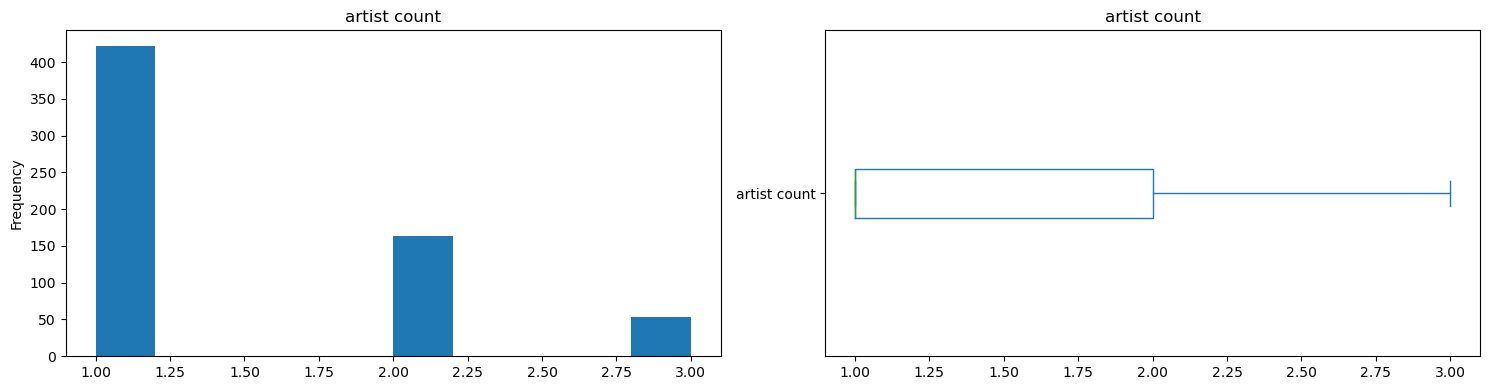

In [144]:
plot_histogram_and_boxplot(train_set, 'artist count')

In [145]:
# Get numerical columns
numerical_columns = train_set.select_dtypes(include=['int64', 'float64']).columns
numerical_columns

Index(['artist count', 'bpm', 'danceability percentage', 'valence percentage',
       'energy percentage', 'acousticness percentage', 'liveness percentage',
       'speechiness percentage'],
      dtype='object')

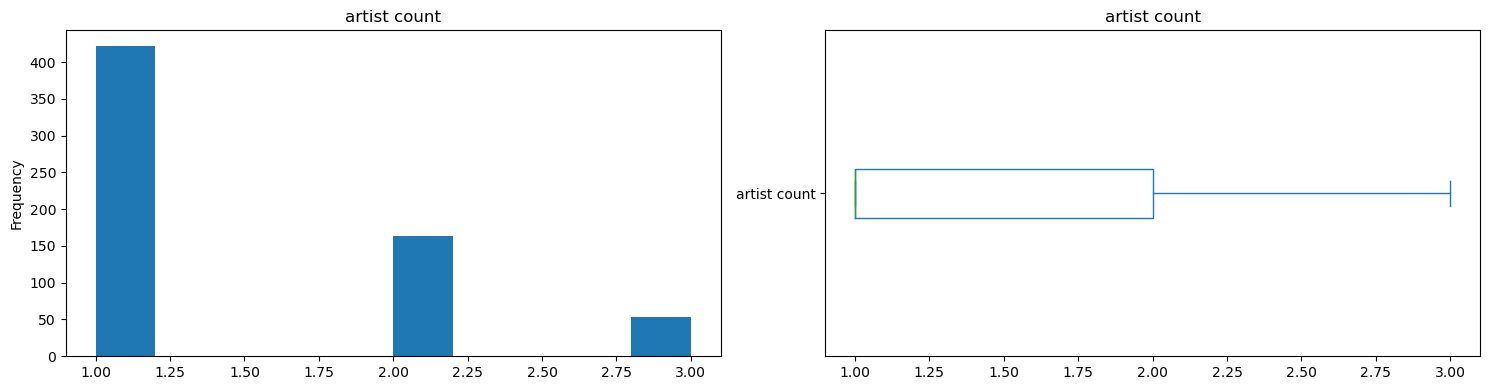

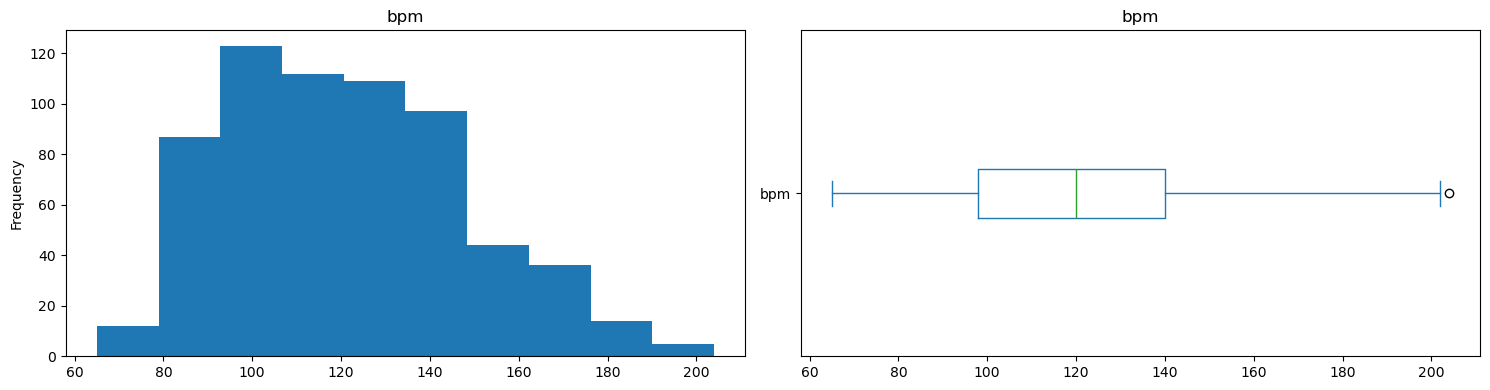

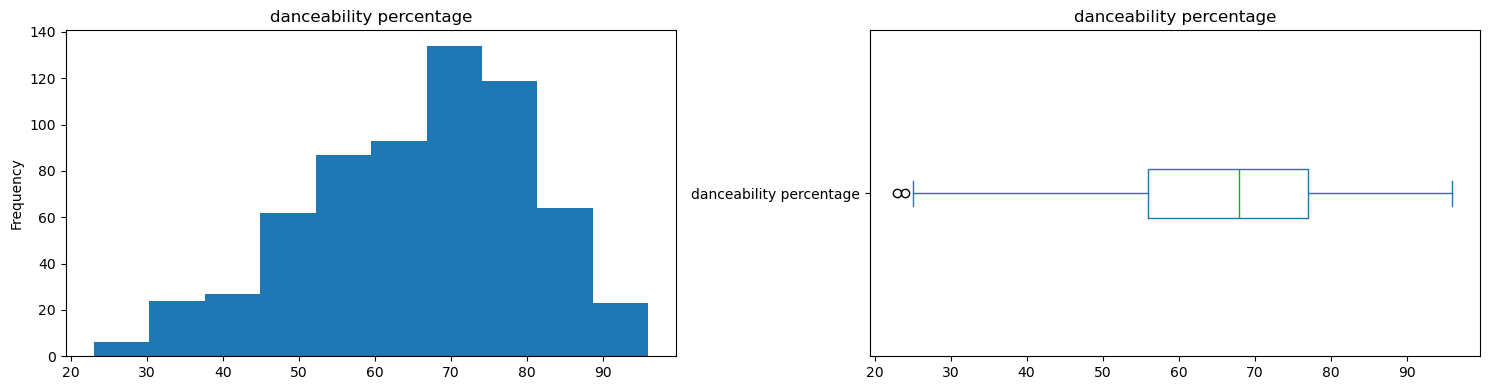

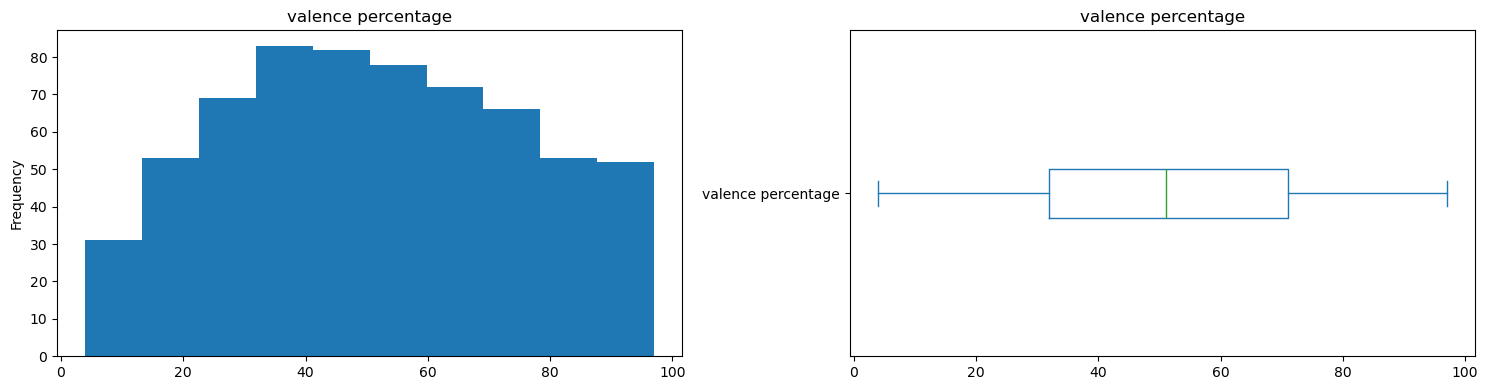

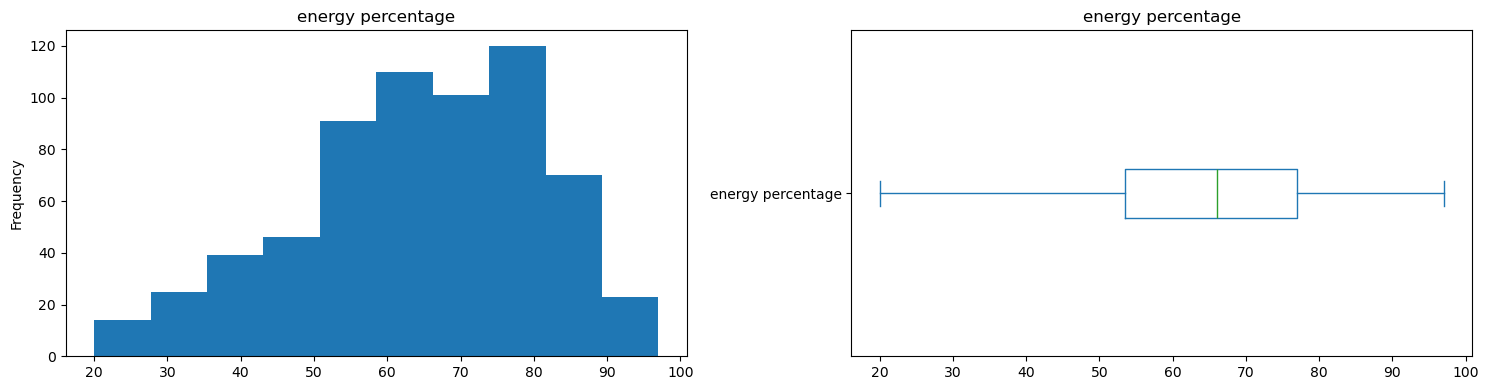

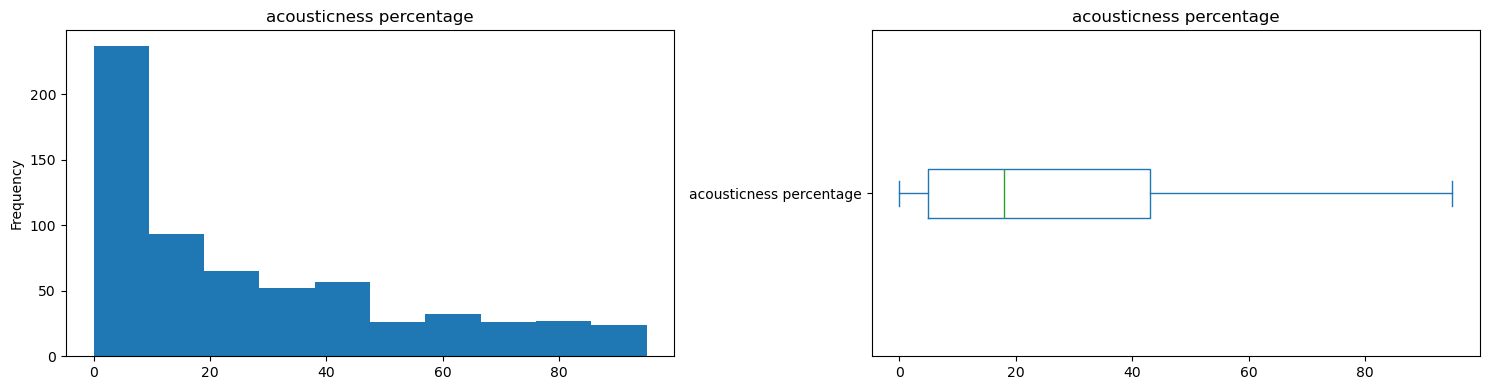

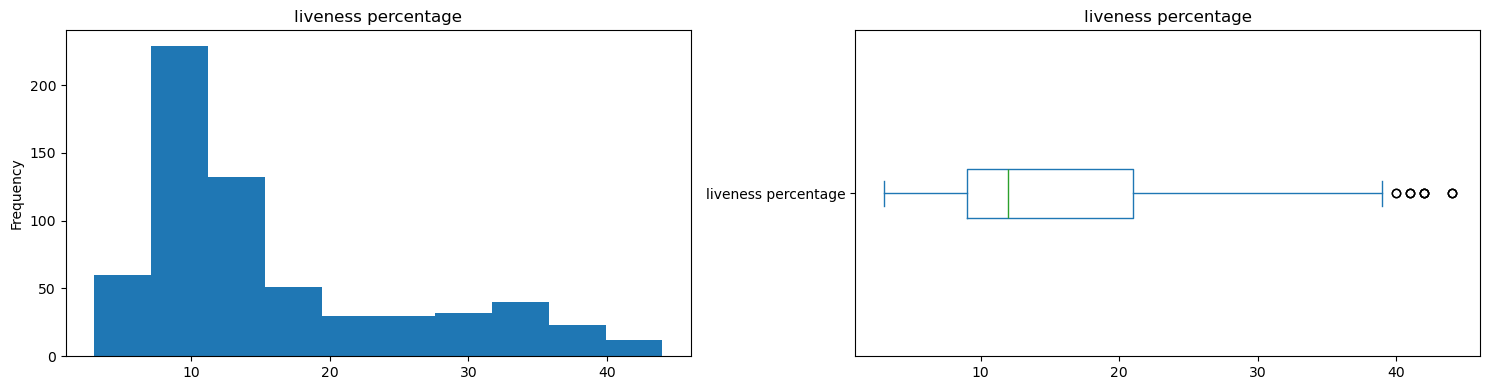

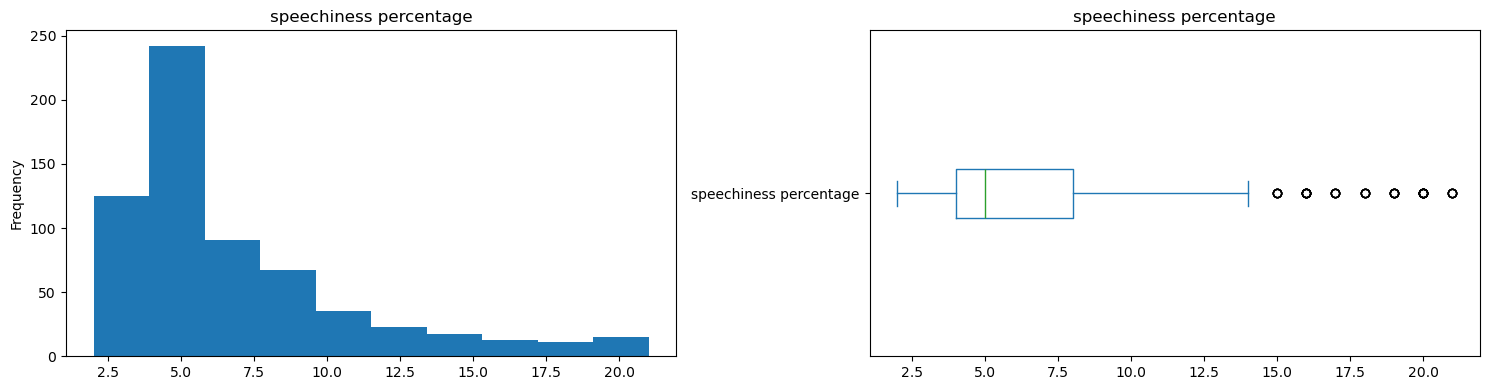

In [146]:
# Plot histogram and boxplot for numerical columns
for col in numerical_columns:
    plot_histogram_and_boxplot(train_set, col)

- At this point, we can see that most of the columns are outlier-free. Hooray!

In [147]:
def clean_test_data(dataset: pd.DataFrame) -> pd.DataFrame:
    dataset = dataset.drop(columns=columns_to_drop)
    
    # Remove the characters from the column names
    dataset.columns = dataset.columns.str.replace('_', ' ')
    dataset.columns = dataset.columns.str.replace('%', 'percentage')
    
    # Address Inconsistencies
    # For all string columns, standardize the text by converting them into lowercase
    # and remove leading and trailing whitespaces
    string_columns = train_set.select_dtypes(include=['object']).columns

    for col in string_columns:
        train_set[col] = train_set[col].str.lower().str.strip()
        
    # Drop `instrumentalness percentage`
    
    # When cleaning the test set, on columns like `key` and `mode`, 
    # if there's a value doesn't exist in the train set, we will replace it with `unknown`.
    dataset['key'] = dataset['key'].fillna('unknown').apply(lambda x: 'unknown' if x not in unique_keys else x)
    dataset['mode'] = dataset['mode'].fillna('unknown').apply(lambda x: 'unknown' if x not in unique_modes else x)
    
    return dataset

In [148]:
# Read the test_set
test_set = pd.read_csv(f"{raw_data_path}/test_set.csv")

# Try if we can clean the test dataset with the function above
cleaned_test_set = clean_test_data(test_set)
cleaned_test_set.head()

,track name,artist(s) name,artist count,streams,bpm,key,mode,danceability percentage,valence percentage,energy percentage,acousticness percentage,instrumentalness percentage,liveness percentage,speechiness percentage
0,Take On Me,a-ha,1,1479115056,84,unknown,unknown,57,86,90,2,0,9,5
1,Rumble,"Skrillex, Flowdan, Fred again..",3,78489819,140,unknown,unknown,81,6,84,5,23,6,6
2,NEW MAGIC WAND,"Tyler, The Creator",2,461437791,140,unknown,unknown,62,46,73,10,0,67,11
3,Falling,Harry Styles,1,1023187129,110,unknown,unknown,57,6,27,84,0,9,3
4,Pepas,Farruko,1,1309887447,130,unknown,unknown,76,44,77,1,0,13,3


In [149]:
# Check unique values of `Key` and `Mode` columns
cleaned_test_set['key'].unique(), cleaned_test_set['mode'].unique()

(array(['unknown'], dtype=object), array(['unknown'], dtype=object))

## Data Transformation

- Okay now the `train_set` is cleaned. Next, we need to perform some transformation on the dataset to help the models easily learn the patterns of the data later.
- Notes: All transformations that are performed on the target feature - which is the `streams` column - need to be reversible.

### Data Type Conversion

In [150]:
def is_integer_string(string: str) -> bool:
    if string[0] in ('-', '+'):
        return string[1:].isdigit()
    
    else:
        return string.isdigit()
    
train_set = train_set[train_set['streams'].apply(is_integer_string)]
train_set['streams'] = train_set['streams'].astype('int64')

### Encoding Categorical Variables

In [151]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 809
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   track name               638 non-null    object
 1   artist(s) name           638 non-null    object
 2   artist count             638 non-null    int64 
 3   streams                  638 non-null    int64 
 4   bpm                      638 non-null    int64 
 5   key                      638 non-null    object
 6   mode                     638 non-null    object
 7   danceability percentage  638 non-null    int64 
 8   valence percentage       638 non-null    int64 
 9   energy percentage        638 non-null    int64 
 10  acousticness percentage  638 non-null    int64 
 11  liveness percentage      638 non-null    int64 
 12  speechiness percentage   638 non-null    int64 
dtypes: int64(9), object(4)
memory usage: 69.8+ KB


- We need to convert `key` and `mode` to categorical variable.

In [152]:
# Create a Binarizer object
label_binarizer = LabelBinarizer()
label_binarizer.fit(train_set['key'])

# Transform the `key` column
binarized_key_df = pd.DataFrame(label_binarizer.transform(train_set['key']))

In [153]:
train_set['mode'] = (train_set['mode']
                    .replace('unknown', 0)
                    .replace('major', 1)
                    .replace('minor', 2))

/var/folders/yf/bvb_cdgn46s4l8cp8l3wd_nc0000gn/T/ipykernel_43339/1629544789.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  .replace('minor', 2))


In [154]:
# Check the result
train_set.info()

<class 'pandas.core.frame.DataFrame'>
Index: 638 entries, 0 to 809
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   track name               638 non-null    object
 1   artist(s) name           638 non-null    object
 2   artist count             638 non-null    int64 
 3   streams                  638 non-null    int64 
 4   bpm                      638 non-null    int64 
 5   key                      638 non-null    object
 6   mode                     638 non-null    int64 
 7   danceability percentage  638 non-null    int64 
 8   valence percentage       638 non-null    int64 
 9   energy percentage        638 non-null    int64 
 10  acousticness percentage  638 non-null    int64 
 11  liveness percentage      638 non-null    int64 
 12  speechiness percentage   638 non-null    int64 
dtypes: int64(10), object(3)
memory usage: 69.8+ KB


### Feature Scaling

- By observing the histograms above, there're some points we can infer:
  - We don't need to do feature scaling on the `artist count` column because we think it's better to keep it as it is.
  - For columns having their shape close to be bell-shaped, we can apply `StandardScaler()` on them. Those columns are: `bpm`, `danceability percentage`, `valence percentage`, `energy percentage`.
  - For columns being heavily right-skewed, we can apply Box-Cox transformation on them. Those columns are: `acousticness percentage`, `liveness percentage`, `speechiness percentage`.

In [155]:
# Create StandardScaler object
standard_scaler = StandardScaler()

columns_to_standard_scale = [
    'bpm',
    'danceability percentage',
    'valence percentage',
    'energy percentage',
]

standard_scaler.fit(train_set[columns_to_standard_scale])
temp_df = pd.DataFrame(standard_scaler
                       .transform(train_set[columns_to_standard_scale]),
                       columns = columns_to_standard_scale)
train_set[columns_to_standard_scale] = temp_df
train_set[columns_to_standard_scale].describe()

,bpm,danceability percentage,valence percentage,energy percentage
count,503.000000,503.000000,503.000000,503.000000
mean,-0.012188,0.010546,0.017954,-0.013997
std,0.996481,0.987155,1.015652,0.980050
min,-2.085844,-2.941764,-1.985162,-2.712056
25%,-0.881143,-0.683555,-0.814884,-0.696253
50%,-0.047119,0.137612,-0.020767,0.097851
75%,0.694236,0.753487,0.856942,0.708700
max,2.992435,2.053668,1.901833,1.991483


- We will use exactly this `standard_scaler` for the test_set later to ensure all datapoints are transformed uniformly.

In [158]:
columns_to_boxcox_transform = [
    'acousticness percentage',
    'liveness percentage',
    'speechiness percentage'
]
# Apply Box-Cox transformation on each column
for col in columns_to_boxcox_transform:
    train_set[col], lmbda = boxcox(train_set[col] + 1)
    
# Check the result
train_set[columns_to_boxcox_transform].describe()

,acousticness percentage,liveness percentage,speechiness percentage
count,638.000000,638.000000,638.000000
mean,4.125364,1.756417,0.903913
std,2.390840,0.201438,0.077782
min,0.000000,1.107519,0.701605
25%,2.229111,1.601615,0.856419
50%,4.248689,1.717186,0.896735
75%,6.106383,1.920298,0.966097
max,8.194503,2.144672,1.053774


- Now all the numerical features have `mean` around `0` and `std` around `1`.

### Feature Engineering